# **Tutorial on Text as Data**: Preprocessing and EDA

Source:  [https://github.com/d-insight/code-bank.git](https://github.com/d-insight/code-bank.git)  
License: [MIT License](https://opensource.org/licenses/MIT). See open source [license](LICENSE) in the Code Bank repository. 

---

## Introduction

Text data are ubiquitous and most of us have to deal with it on a daily job. In this workshop, we will learn how to work with text data under different aspects.

Natural Language Processing, the interactions between computers and human languages, is widely used in many different fields including speech recognition, natural language understanding, and natural language generation.

Imagine you want to consolidate the brand identity of your firm and you want to understand what your clients are saying about your brand and your products. You are given a long list of reviews of both your company as well as other firms, what do you do? In this workshop we will see how we can extract insights from such data as well as understand which reviews are positive and which are negative.

This tutorial is composed of four different Jupyter Notebooks. All four make use of the same dataset, [Yelp Dataset](https://www.kaggle.com/yelp-dataset/yelp-dataset). This dataset is a subset of Yelp's businesses, reviews, and user data. It was originally put together for the Yelp Dataset Challenge which is a chance for students to conduct research or analysis on Yelp's data and share their discoveries. In the dataset, you'll find information about businesses across 11 metropolitan areas in four countries.

## Overview

In this notebook you will learn how to:
    1. Extract text data from PDF
    2. Understand how to analyze both structured and unstructured data such as text data
    3. Preprocess and clean text data

## Part 1: PDF Data Extraction

Document with text data might have different extensions, PDF is one of the most common. Here, we will extract text data from PDF files and store them into a Pandas DataFrame. If you work with other file types such as power point presentation the procedure is about the same.

**Learning objective**: being able to extract text data from pdf and store it into Pandas.

**Useful resources**:
 - [glob](https://docs.python.org/3.7/library/glob.html) a python module from the standard library to find all the pathnames that match a specified pattern
 - [pdfminer.six](https://github.com/pdfminer/pdfminer.six) a third party python library to work with pdf files

Q1: Under `data/pdf_review` you can find a list of reviews in pdf format. Employing the `glob` module, save the name of such files into a list called `pdf_review`. Display on-screen the number of pdf files as well as the first three filenames.

> ☝️ The glob module is part of the python standard library. It often helps to find and extract filenames and file paths of multiple sources.

> ☝️ Try to open a pdf review with your favorite PDF viewer to get a glance of the raw data itself  

In [1]:
import glob
pdf_reviews = glob.glob("./data/pdf_reviews/*.pdf")

print(f"There are {len(pdf_reviews)} pdf files.")
pdf_reviews[:3]

There are 100 pdf files.


['./data/pdf_reviews/review_94.pdf',
 './data/pdf_reviews/review_80.pdf',
 './data/pdf_reviews/review_57.pdf']

Q2: With the aid of [pdfminer.six](https://github.com/pdfminer/pdfminer.six), iterate over all pdf reviews found under `data/pdf_reviews/`, extract the text and store it into a `text_review` list. Look at the first two reviews. What do you notice?

In [2]:
from pdfminer.high_level import extract_text

text_review = [extract_text(r) for r in pdf_reviews]
text_review[:1]

['Award Nails & Spa\n\n350 W Baseline Rd, Ste 103, AZ\n\n(33.3798464, -111.838931)\n\n• date: 2019-07-01 21:38:40\n• stars:: 5.0\n• categories: Beauty & Spas, Nail Salons\n\nReview:\n\nOkay I took my daughter who is 12 here after calling ﬁrst. She had got her nails done elsewhere\nand were not done well she was rushed because she was young.\n\nFixed my daughters nails! Wow Award Nails did such a great job. My daughter even shortened\nthem so she can play the guitar. They tapered and ﬁxed the crooked one from the last salon and\ntook there time and thinned them. We only waited 10min before she sat down. I did have to get\nsomeone’s attention and told them we called. They were great! Took her right back and she wasn’t\ntreated diﬀerently because she was young! She picked army green and gold glitter on her ring ﬁnger\nand they turned out great and the shape was on point!!. I will post the nails they ﬁxed they were a\nblue bulky thick square and not what I wanted for her.\n\n1\n\n\x0c']

**Answer** The extracted text data contains some special symbols that will need to be removed and preprocessed. 

Q3: Save the obtained `text_review` into a `pdf_review_df` Pandas DataFrame and look at the first 5 rows.

> ☝️When working with Pandas Dataframe is a good practice to prepend the variable name with `_df`

In [3]:
import pandas as pd
pdf_review_df = pd.DataFrame(text_review, columns=['text'])
pdf_review_df.head()

,text
0,"Award Nails & Spa\n\n350 W Baseline Rd, Ste 10..."
1,"Kahu Hawaiian BBQ\n\n7509 W Encanto Blvd, AZ\n..."
2,"Cornish Pasty\n\n10 E Charleston Blvd, NV\n\n(..."
3,"Pai Northern Thai Kitchen\n\n18 Duncan Street,..."
4,"Mi Taco Taqueria\n\n247 Queen Street W, ON\n\n..."


## Part 2: Exploratory Data Analysis

Before executing any fancy machine learning model, it's useful to have a good understanding of the data we are about to deal with.

The previous created DataFrame is composed of only 100 reviews.
For this part we will start with a larger dataset composed of 150'000 reviews.

**Learning objective**: be able to visualize and analyze both structured (categorical, numerical, etc.) and text data.

### Structured data

Q1: Load all reviews into a Pandas DataFrame named `df` and display the first five rows.

> ☝️ Executing operations on 150k of data might take a while. As a suggestion, you might want to sample about 10k of data, write the code and look at the results and only at the end execute again the code on the whole dataset (Kernel > Restart and Run All). Once the data are loaded, you can use the following snippet of code to sample 10 thousands reviews: `df = df.sample(10000).reset_index(drop=True)`

In [4]:
# Settings for high-quality graphs
import matplotlib.pyplot as plt

import numpy as np
# Fix random seed for reproducibility
np.random.seed(42)

%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [5]:
df = pd.read_csv("./data/yelp_review.csv")
df = df.sample(10000).reset_index(drop=True)
df.head()

,stars,text,business_id
0,5.0,Omar is great! He can diagnose and correct an...,bF2Otgh1KTT6E2VUgXvs7Q
1,1.0,TERRIBLE!!! I went to this salon due to its cl...,msPD9PRi9jdoO7xYVs8JhA
2,1.0,Horrible service! Place was not busy at all 1p...,YlwJYpBWa-oL0byTVPNKRQ
3,3.0,Not too impress...but it was my first time goi...,mX2L5zlPzXbXtmOggTMpuQ
4,3.0,I have always had acrylics my entire life and ...,QV_o4jS2tyH7JfUXFVWkSA


Q2: Even if we are principally dealing with text data, we are still interested in any structured data as this might help with our task. Information such as the kind of business and the city of the business might be useful for instance. You are given a second dataset (`yelp_business.csv`) containing some extra information regarding the business.

Load into a Pandas DataFrame named `df_business` the `yelp_business.csv` dataset and look at the first rows. Then, merge it with the initial `df` DataFrame. Which column you need to use to _merge_ the two datasets?

In [6]:
df_business = pd.read_csv("./data/yelp_business.csv")
df_business.head()

,business_id,categories,name,address,city,state,latitude,longitude,stars
0,f9NumwFMBDn751xgFiRbNA,"Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...",The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,35.462724,-80.852612,3.5
1,Yzvjg0SayhoZgCljUJRF9Q,"Health & Medical, Fitness & Instruction, Yoga,...","Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,33.569404,-111.890264,5.0
2,XNoUzKckATkOD1hP6vghZg,"Pets, Pet Services, Pet Groomers",Felinus,3554 Rue Notre-Dame O,Montreal,QC,45.479984,-73.580070,5.0
3,6OAZjbxqM5ol29BuHsil3w,"Hardware Stores, Home Services, Building Suppl...",Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,36.219728,-115.127725,2.5
4,51M2Kk903DFYI6gnB5I6SQ,"Home Services, Plumbing, Electricians, Handyma...",USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,33.428065,-111.726649,4.5


In [7]:
df = df.merge(df_business, on='business_id', suffixes=('', '_business'))
df.head(2)

,stars,text,business_id,categories,name,address,city,state,latitude,longitude,stars_business
0,5.0,Omar is great! He can diagnose and correct an...,bF2Otgh1KTT6E2VUgXvs7Q,"Mobile Phones, Shopping, Telecommunications, M...",T-Mobile,"16635 N Tatum Blvd, Ste 110",Phoenix,AZ,33.638197,-111.977294,3.0
1,1.0,TERRIBLE!!! I went to this salon due to its cl...,msPD9PRi9jdoO7xYVs8JhA,"Day Spas, Beauty & Spas, Nail Salons",Pretty Nails,1660 E Camelback Rd,Phoenix,AZ,33.510343,-112.046240,3.0


Q3: The `categories` column of the new Dataframe represents the type of business of the review. Identify and count the occurrences for each category and plot it using a bar chart. How many categories are there and what are the most common categories?

In [8]:
category_counts = (
    df['categories']
    .str.lower()    # Lowercase all
    .str.split(",") # "Restaurants, Brunch" => ["Restaurant", "Brunch"]    
    .explode()      # Exploded lists to rows of the subset columns
    .str.strip()    # Remove trailing spaces
    .value_counts()
)

category_counts[:20]

restaurants                  6297
food                         2316
nightlife                    1878
bars                         1705
american (new)               1143
american (traditional)       1119
breakfast & brunch           1042
event planning & services     860
shopping                      752
sandwiches                    724
arts & entertainment          639
beauty & spas                 631
burgers                       626
mexican                       622
seafood                       582
pizza                         573
italian                       561
coffee & tea                  550
hotels & travel               520
home services                 463
Name: categories, dtype: int64

In [9]:
print(f"There are {len(category_counts)} unique categories.")

There are 912 unique categories.


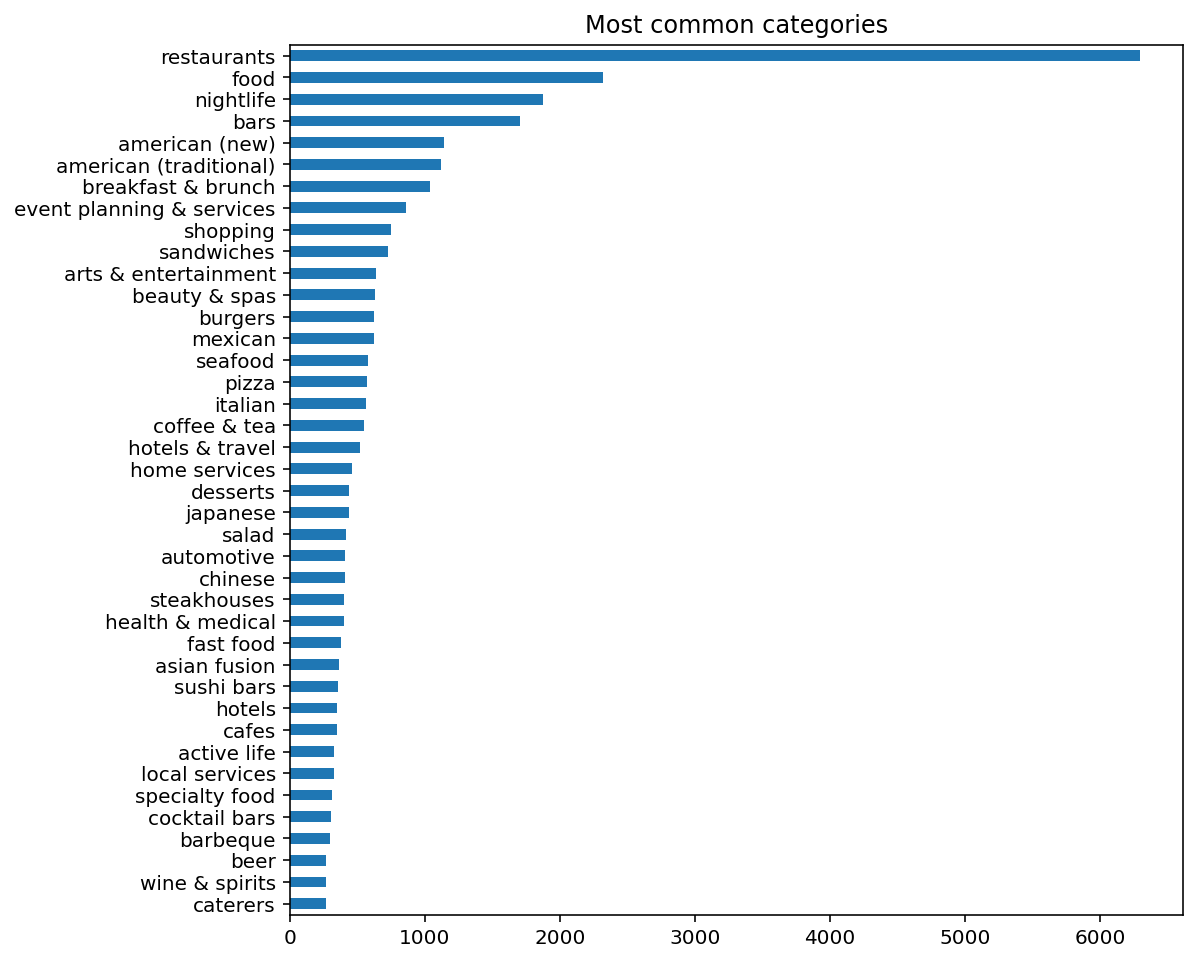

In [10]:
title = "Most common categories"
category_counts[:40].sort_values().plot.barh(figsize=(8,8), title=title);

Q4: With a bar plot, display the the review's stars. What are average and median values?

> ☝️Keep in mind these results, they'll be useful later.

Average rating: 3.6882
Median rating: 4.0


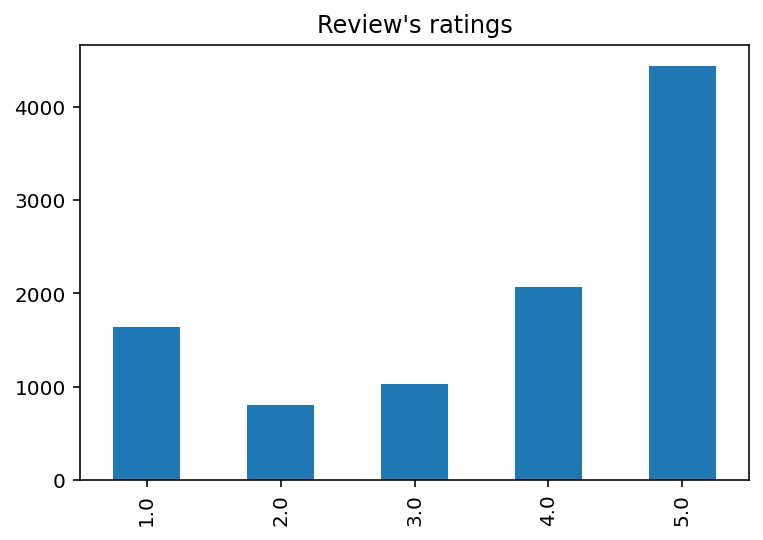

In [11]:
title = "Review's ratings"

df['stars'].value_counts().sort_index().plot.bar(title=title);
print(f"Average rating: {df['stars'].mean()}")
print(f"Median rating: {df['stars'].median()}")

### Text data

Q5: Add a new column `words_len` corresponding to the number of words of the `text` column. You can use the `str.split()` function to split a string. Then, display the histogram of the new column. What is the average number of words per review?

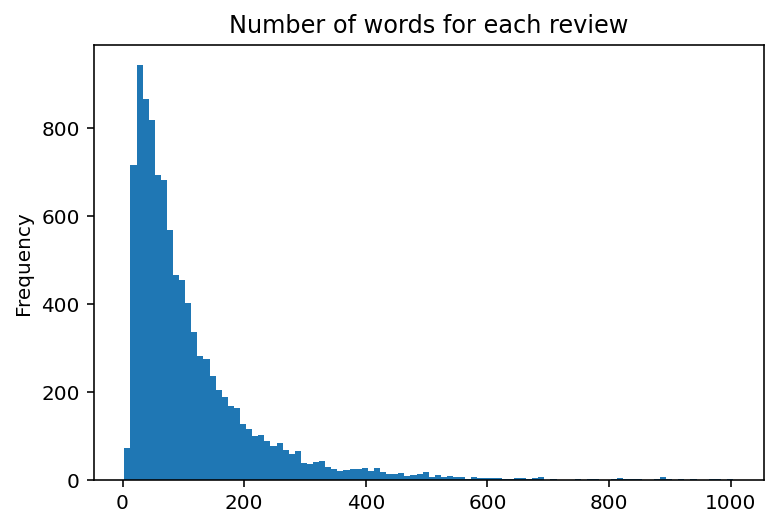

In [12]:
df['words_len'] = df['text'].str.split().str.len()

title = "Number of words for each review"
df['words_len'].plot.hist(title=title, bins=100);

In [13]:
print(f"Average number of tokens is {df['words_len'].mean()}")

Average number of tokens is 110.8038


Q5: Print the most common 20 words. What do you notice?

In [14]:
top_words = df['text'].str.lower().str.split().explode().value_counts()

NUM_TOP_WORDS = 20
top_words[:NUM_TOP_WORDS]

the     54299
and     38300
i       29162
a       27322
to      27091
was     19479
of      15385
for     12948
is      12612
in      11921
it      11670
my      11064
they     9019
we       8980
that     8890
with     8825
this     8713
but      7961
you      7552
on       7485
Name: text, dtype: int64

**Answer:** most of the common words are stopwords, i.e words without a special meaning.

## Part 3: Data Cleaning

When dealing with text data, data cleaning is an essential step. In general, data cleaning is both domain and task-dependent. In this section, we will see a universal pipeline valid in most scenarios. Data cleaning is also an iterative process.

**Learning objective**: learn the main steps for text preprocessing, as well as experiment with regular expressions

### Regular expressions

**Useful resources**:
 - https://www.regular-expressions.info - The Premier website about Regular Expressions

Q1: Store the the first review of the the `pdf_review_df` DataFrame in a variable `r`, display it and by using regular expressions extract the `date`, the `categories` as well as the rating `stars`.

> ☝️You can use this snippet of code to visualize the first review: `pdf_review_df.iloc[0]['text']`

In [15]:
r = pdf_review_df.iloc[0]['text']
r

'Award Nails & Spa\n\n350 W Baseline Rd, Ste 103, AZ\n\n(33.3798464, -111.838931)\n\n• date: 2019-07-01 21:38:40\n• stars:: 5.0\n• categories: Beauty & Spas, Nail Salons\n\nReview:\n\nOkay I took my daughter who is 12 here after calling ﬁrst. She had got her nails done elsewhere\nand were not done well she was rushed because she was young.\n\nFixed my daughters nails! Wow Award Nails did such a great job. My daughter even shortened\nthem so she can play the guitar. They tapered and ﬁxed the crooked one from the last salon and\ntook there time and thinned them. We only waited 10min before she sat down. I did have to get\nsomeone’s attention and told them we called. They were great! Took her right back and she wasn’t\ntreated diﬀerently because she was young! She picked army green and gold glitter on her ring ﬁnger\nand they turned out great and the shape was on point!!. I will post the nails they ﬁxed they were a\nblue bulky thick square and not what I wanted for her.\n\n1\n\n\x0c'

In [16]:
import re

date = re.findall("date: ([\d+\- :]+)", r)
print("date: ", date)

categories = re.findall("categories: ([\w &,\.]+)", r)
print("categories: ", categories)

stars = re.findall("stars:: (\d+)", r)
print("stars: ", stars)

date:  ['2019-07-01 21:38:40']
categories:  ['Beauty & Spas, Nail Salons']
stars:  ['5']


> ☝️ Regular expressions are a powerful tool. In most cases, there are many ways of solving the same problem.

### Tokenization

Tokenization refers to the act of splitting a sentence into a list of tokens (words). This is an essential step as it will allows us to later map every word to a number that the computer and the machine learning algorithms (regression, classification, deep learning, whatever, ...) can understand. 

Q1: Before tokenizing the whole dataset, let's compare different algorithms on the `review_example`. Start by splitting the first review `r` by the empty space (` `) and look at the result. What do you notice? What's the main issue with this approach?

In [17]:
print(r.split())

['Award', 'Nails', '&', 'Spa', '350', 'W', 'Baseline', 'Rd,', 'Ste', '103,', 'AZ', '(33.3798464,', '-111.838931)', '•', 'date:', '2019-07-01', '21:38:40', '•', 'stars::', '5.0', '•', 'categories:', 'Beauty', '&', 'Spas,', 'Nail', 'Salons', 'Review:', 'Okay', 'I', 'took', 'my', 'daughter', 'who', 'is', '12', 'here', 'after', 'calling', 'ﬁrst.', 'She', 'had', 'got', 'her', 'nails', 'done', 'elsewhere', 'and', 'were', 'not', 'done', 'well', 'she', 'was', 'rushed', 'because', 'she', 'was', 'young.', 'Fixed', 'my', 'daughters', 'nails!', 'Wow', 'Award', 'Nails', 'did', 'such', 'a', 'great', 'job.', 'My', 'daughter', 'even', 'shortened', 'them', 'so', 'she', 'can', 'play', 'the', 'guitar.', 'They', 'tapered', 'and', 'ﬁxed', 'the', 'crooked', 'one', 'from', 'the', 'last', 'salon', 'and', 'took', 'there', 'time', 'and', 'thinned', 'them.', 'We', 'only', 'waited', '10min', 'before', 'she', 'sat', 'down.', 'I', 'did', 'have', 'to', 'get', 'someone’s', 'attention', 'and', 'told', 'them', 'we', 'c

**Answers** Some of the tokens such as `first.` should be splitted further.

Q2: Execute again the tokenization, this time using [spaCy](https://spacy.io/) ("Industrial-Strength Natural Language Processing"), a common python package for NLP tasks. How does it look like compared to the previous solution? What are the advantages and disadvantages of the two approaches?

In [18]:
import spacy
nlp = spacy.load("en_core_web_sm")
review_example_spacy = nlp(r)

tokens_spacy = []
for token in review_example_spacy:
    token = token.text.strip() # remove starting and ending space
    tokens_spacy.append(token)

print(tokens_spacy)

['Award', 'Nails', '&', 'Spa', '', '350', 'W', 'Baseline', 'Rd', ',', 'Ste', '103', ',', 'AZ', '', '(', '33.3798464', ',', '-111.838931', ')', '', '•', 'date', ':', '2019', '-', '07', '-', '01', '21:38:40', '', '•', 'stars', ':', ':', '5.0', '', '•', 'categories', ':', 'Beauty', '&', 'Spas', ',', 'Nail', 'Salons', '', 'Review', ':', '', 'Okay', 'I', 'took', 'my', 'daughter', 'who', 'is', '12', 'here', 'after', 'calling', 'ﬁrst', '.', 'She', 'had', 'got', 'her', 'nails', 'done', 'elsewhere', '', 'and', 'were', 'not', 'done', 'well', 'she', 'was', 'rushed', 'because', 'she', 'was', 'young', '.', '', 'Fixed', 'my', 'daughters', 'nails', '!', 'Wow', 'Award', 'Nails', 'did', 'such', 'a', 'great', 'job', '.', 'My', 'daughter', 'even', 'shortened', '', 'them', 'so', 'she', 'can', 'play', 'the', 'guitar', '.', 'They', 'tapered', 'and', 'ﬁxed', 'the', 'crooked', 'one', 'from', 'the', 'last', 'salon', 'and', '', 'took', 'there', 'time', 'and', 'thinned', 'them', '.', 'We', 'only', 'waited', '10m

**Answers** tokenization with spaCy is slower but it does a better job (in most cases) in separating some tokens (for instance `first.`). Note also that with the second approach the date `2019-07-01` has been splitter further, this might or might not be the best solution, depending on the task one is trying to achieve.

Q3: Tokenize the whole DataFrame `df` using spaCy by adding a new colum `tokenized` to the dataset. Display the first five rows. This operation might take a while (3-5 minutes), you can monitor the progress using [tqdm](https://pypi.org/project/tqdm/).

In [19]:
%%time
from tqdm import tqdm
tqdm.pandas()

import spacy
nlp = spacy.load("en_core_web_sm")

def tokenize(text):
    
    # for a faster operation, we can limit the number of character to 500
    # doing that we might split a word that is sub-optimal.
    #text = text[:500]
    
    nlp_text = nlp(text)
    tokens_spacy = []
    for token in nlp_text:
        token = token.text.strip() # remove starting and ending space
        tokens_spacy.append(token)
    return tokens_spacy
    
df['tokenized'] = df['text'].progress_apply(tokenize)
df.head(2)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████| 10000/10000 [04:10<00:00, 39.95it/s]

CPU times: user 3min 37s, sys: 15.8 s, total: 3min 53s
Wall time: 4min 11s


,stars,text,business_id,categories,name,address,city,state,latitude,longitude,stars_business,words_len,tokenized
0,5.0,Omar is great! He can diagnose and correct an...,bF2Otgh1KTT6E2VUgXvs7Q,"Mobile Phones, Shopping, Telecommunications, M...",T-Mobile,"16635 N Tatum Blvd, Ste 110",Phoenix,AZ,33.638197,-111.977294,3.0,34,"[Omar, is, great, !, , He, can, diagnose, and,..."
1,1.0,TERRIBLE!!! I went to this salon due to its cl...,msPD9PRi9jdoO7xYVs8JhA,"Day Spas, Beauty & Spas, Nail Salons",Pretty Nails,1660 E Camelback Rd,Phoenix,AZ,33.510343,-112.046240,3.0,155,"[TERRIBLE, !, !, !, I, went, to, this, salon, ..."


### Removal of stopwords

As seen previously, some of the most common words in the dataset does not brings any valuable meaning to the reviews. This words are known as _stopwords_.

There are two main approaches to remove stopwords:
 1. Remove all top words. In this case it's important to carefully choose the threshold.
 2. Remove all words that appears in a pre-defined stopwords list.
 
#### Remove all _top_words_

Q1: First, create a list of stopwords you want to get rid of. Look at the `top_words` and create a python `set` of _top_words_. Be careful in selecting the right threshold.

In [20]:
top_words[:30]

the     54299
and     38300
i       29162
a       27322
to      27091
was     19479
of      15385
for     12948
is      12612
in      11921
it      11670
my      11064
they     9019
we       8980
that     8890
with     8825
this     8713
but      7961
you      7552
on       7485
have     6925
not      6479
had      6164
so       5816
were     5619
at       5478
are      5295
be       4696
as       4657
very     4201
Name: text, dtype: int64

In [21]:
STOPWORDS_THRESHOLD = 28
stopwords = top_words[:STOPWORDS_THRESHOLD]

Q2: Define a function `remove_stopwords(tokenized_text, list_stopwords)` that given a tokenized text, removes all `list_stopwords`. Apply this function to the `tokenized` Series and store the results into another column, `without_stopwords`, of the DataFrame.

> ☝️In some cases, the tokens in the stopwords list are lowercased. Make sure to take this fact into consideration when developing your own solution.

In [22]:
def remove_stopwords(tokenized_text, list_stopwords):
    return [t for t in tokenized_text if t.lower() not in list_stopwords]

remove_stopwords(tokenized_text=["is", "Beautiful", "!"], list_stopwords=["is"])

['Beautiful', '!']

#### Use a pre-defined stopwords list

A more common approach is to remove all stopwords already pre-defined in a stopwords list. In most cases, this is a more stable solution as this permits to remove all stopwords without the risk of removing important but common words.

> ☝️ Historically, one of the most common stopwords list is the one provided by [NLTK](). A more modern and valid alternative is to use the list of stopwords provided by spaCy

Q3: Load the spaCy stopwords list and `apply` again the function on the new set as you did before.

In [23]:
from spacy.lang.en import stop_words as spacy_en_stopword
spacy_stopwords = spacy_en_stopword.STOP_WORDS

In [24]:
df['without_stopwords'] = df['tokenized'].apply(lambda row: remove_stopwords(row, spacy_stopwords))
df['without_stopwords']

0       [Omar, great, !, , diagnose, correct, cell, ph...
1       [TERRIBLE, !, !, !, went, salon, close, proxim...
2       [Horrible, service, !, Place, busy, 1, pm, ., ...
3       [impress, ..., time, going, got, deal, day, .....
4       [acrylics, entire, life, time, place, cracked,...
                              ...                        
9995    [thing, notice, arrived, place, looks, bit, ol...
9996    [intimate, place, ,, clean, ., Sun, Prairie, e...
9997    [takes, lot, leave, good, bad, review, ., Main...
9998    [avid, Panera, lover, ., location, opened, ecs...
9999    [drive, 2015, Audi, A3, ,, shop, recommended, ...
Name: without_stopwords, Length: 10000, dtype: object

Q4: Join back the splitted tokens to generate a single string for each cell of the Pandas Series. Look at the head of the DataFrame and finnaly store it as a csv file: `review_clean.csv`.

In [25]:
df['text_clean'] = df['without_stopwords'].str.join(sep=" ")
df[["text_clean", "text", "stars", "categories", "name", "address"]].to_csv("./data/review_clean.csv", index=False)
df.head(3)

,stars,text,business_id,categories,name,address,city,state,latitude,longitude,stars_business,words_len,tokenized,without_stopwords,text_clean
0,5.0,Omar is great! He can diagnose and correct an...,bF2Otgh1KTT6E2VUgXvs7Q,"Mobile Phones, Shopping, Telecommunications, M...",T-Mobile,"16635 N Tatum Blvd, Ste 110",Phoenix,AZ,33.638197,-111.977294,3.0,34,"[Omar, is, great, !, , He, can, diagnose, and,...","[Omar, great, !, , diagnose, correct, cell, ph...",Omar great ! diagnose correct cell phone issu...
1,1.0,TERRIBLE!!! I went to this salon due to its cl...,msPD9PRi9jdoO7xYVs8JhA,"Day Spas, Beauty & Spas, Nail Salons",Pretty Nails,1660 E Camelback Rd,Phoenix,AZ,33.510343,-112.046240,3.0,155,"[TERRIBLE, !, !, !, I, went, to, this, salon, ...","[TERRIBLE, !, !, !, went, salon, close, proxim...",TERRIBLE ! ! ! went salon close proximity waxi...
2,1.0,Horrible service! Place was not busy at all 1p...,YlwJYpBWa-oL0byTVPNKRQ,"Food Court, Beer Gardens, Music Venues, Bars, ...",The Park,"3 S 2nd St, Ste 114",Phoenix,AZ,33.447238,-112.071084,2.5,50,"[Horrible, service, !, Place, was, not, busy, ...","[Horrible, service, !, Place, busy, 1, pm, ., ...",Horrible service ! Place busy 1 pm . Bartender...


🎉 Congratulation: you just finished the first part!

You learned how to extract text data from PDF, how to load and visualize text data with Pandas as well as how a text-preprocessing pipeline generally look like. In the next sections, we will use the `review_clean.csv` dataset and try to extract some insights out of it!